# COMP5318 - Machine Learning and Data Mining 

## Tutorial 12 - Clustering

**Semester 2, 2019**

**Objectives:**

* To learn about k-means clustering algorithm. 

**Instructions:**
* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "lab12.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "lab12.ipynb" file
* Complete exercises in "lab12.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.


Lecturers: Nguyen Hoang Tran

Tutors: Fengxiang He, Shaojun Zhang, Fangzhou Shi, Yang Lin, Iwan Budiman, Zhiyi Wang, Canh Dinh, Yixuan Zhang, Rui Dong, Haoyu He, Dai Hoang Tran, Peibo Duan

 ------------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

## 1. K-means clustering

*Step 1:* **Generate/collect data**

In [2]:
#This is a function to generate data.
def gen_data(means, covs, weights, n_datapoints):
    n_datapoints = np.hstack((0, n_datapoints))
    data = np.empty((n_datapoints.sum(), 2))
    for i in range(len(means)):
        data[np.sum(n_datapoints[:(i+1)]):np.sum(n_datapoints[:(i+2)]), :] \
            = np.clip(weights[i]*np.random.multivariate_normal(means[i], covs[i], n_datapoints[i+1]), -10, 10)
    return data

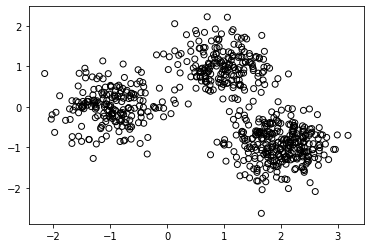

In [3]:
means = np.array([[1, 1], [-1, 0], [2, -1]])

covs = [np.array([[0.2, 0], [0, 0.2]]),
        np.array([[0.2, 0], [0, 0.2]]),
        np.array([[0.2, 0], [0, 0.2]])]

mixing_coef = np.array([1, 1, 1])

n_datapoints = np.array([200, 200, 300])

X = gen_data(means, covs, mixing_coef, n_datapoints) #np.reshape(, (s, s))

pl.scatter(X[:,0], X[:,1], marker='o', c='', edgecolor='k') #Data

*Step 2:* **Assigning 3 random points as cluster centers.**

In [4]:
K = 3  # There are three clusters in this dataset
N = X.shape[0]
k_means_cluster_centers = #TODO: Generate 3 random centers for the 3 clusters
print('k_means_cluster_centers=\n', k_means_cluster_centers)

k_means_cluster_centers=
 [[ 2.58281446 -1.1560796 ]
 [ 1.95123213 -0.87225368]
 [ 0.66899608  0.75318496]]


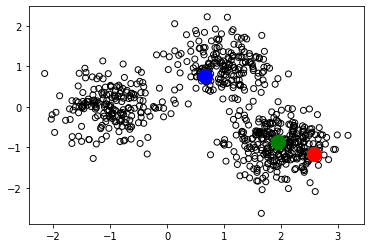

In [5]:
#Plotting
pl.scatter(X[:,0], X[:,1], marker='o', c='', edgecolor='k') #Data
pl.scatter(k_means_cluster_centers[0,0], k_means_cluster_centers[0,1], c='r', s=200) #Cluster center 1
pl.scatter(k_means_cluster_centers[1,0], k_means_cluster_centers[1,1], c='g', s=200) #Cluster center 2
pl.scatter(k_means_cluster_centers[2,0], k_means_cluster_centers[2,1], c='b', s=200) #Cluster center 3

*Step 3:* **Calculating the distance to each cluster**

In [6]:
distance_to_each_cluster = np.zeros((X.shape[0], K))
for k in range(K):
    distance_to_each_cluster[:, k] = #TODO: Calculate distance to each cluster center
print('Distance to each cluster: k=1, k=2 & k=3\n', distance_to_each_cluster)

Distance to each cluster: k=1, k=2 & k=3
 [[9.70533842e+00 6.35664490e+00 2.85762775e-01]
 [5.88523120e+00 3.25625810e+00 8.18129067e-02]
 [7.05347900e+00 4.07714729e+00 3.38039248e-03]
 ...
 [3.61505066e-01 3.09572003e-02 4.97849758e+00]
 [6.63114309e-01 8.15883514e-02 4.62534811e+00]
 [8.22526218e-01 6.01619836e-02 3.33642895e+00]]


*Step 4:* **Determing the cluster for each point**

k_means_labels= [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 0 1 0
 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 

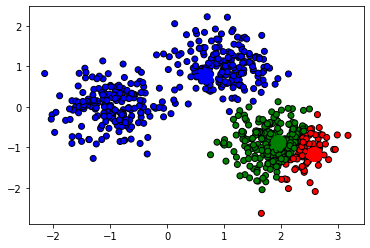

In [7]:
k_means_labels = #TODO: Determine cluster based on the minimum distance
print('k_means_labels=', k_means_labels)

colors = ['r', 'g', 'b']
pl.scatter(X[:,0], X[:,1], marker='o', c=np.array(colors)[k_means_labels], edgecolor='k') #Data
pl.scatter(k_means_cluster_centers[0,0], k_means_cluster_centers[0,1], c='r', s=200) #Cluster center 1
pl.scatter(k_means_cluster_centers[1,0], k_means_cluster_centers[1,1], c='g', s=200) #Cluster center 2
pl.scatter(k_means_cluster_centers[2,0], k_means_cluster_centers[2,1], c='b', s=200) #Cluster center 3

*Step 5:* **Calculating cluster centers**

In [8]:
k_means_cluster_centers = #TODO: Calculate the new cluster centers
print(k_means_cluster_centers)

[[ 2.47604417 -1.13446139]
 [ 1.80329274 -0.87639244]
 [ 0.00341733  0.51119233]]


*Step 6:* **Repeating steps 3 and 4**

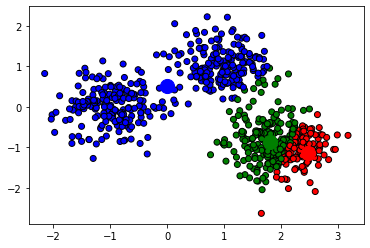

In [9]:
#Repeat steps
distance_to_each_cluster = np.zeros((X.shape[0], K))
for k in range(K):
    distance_to_each_cluster[:, k] = #TODO: Calculate distance to each cluster center
k_means_labels = #TODO: Determine cluster based on the minimum distance

colors = ['r', 'g', 'b']
pl.scatter(X[:,0], X[:,1], marker='o', c=np.array(colors)[k_means_labels], edgecolor='k') #Data
pl.scatter(k_means_cluster_centers[0,0], k_means_cluster_centers[0,1], c='r', s=200) #Cluster center 1
pl.scatter(k_means_cluster_centers[1,0], k_means_cluster_centers[1,1], c='g', s=200) #Cluster center 2
pl.scatter(k_means_cluster_centers[2,0], k_means_cluster_centers[2,1], c='b', s=200) #Cluster center 3

*Step 7:* **Repeating steps 5 and 6 iteratively**

In [10]:
def k_means(X, K):
    # Initialization
    N = X.shape[0]
    distance_to_each_cluster = np.zeros((N, K))
    k_means_cluster_centers = #TODO: Generate K random centers for the K clusters
    loss = np.finfo(float).max

    max_iter = 100
    for i in range(max_iter):
        loss_old = loss

        #TODO: E-step, update indicators
        for k in range(K):
            distance_to_each_cluster[:, k] = #TODO: Calculate distance to each cluster center
        k_means_labels = #TODO: Determine cluster based on the minimum distance

        #TODO: M-step, update means
        k_means_cluster_centers = #TODO: Determine the new cluster centers
        
        #TODO: Calculate loss function
        loss = #TODO

        #Stop if the loss percentage is very small
        if (loss_old - loss)/loss_old < 1e-5:
            break
    return k_means_labels, k_means_cluster_centers

In [11]:
k_means_labels, k_means_cluster_centers = k_means(X, K=3)

*Step 8:* **Plotting the final result**

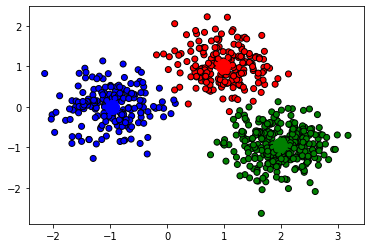

In [12]:
colors = ['r', 'g', 'b']
pl.scatter(X[:,0], X[:,1], marker='o', c=np.array(colors)[k_means_labels], edgecolor='k') #Data
pl.scatter(k_means_cluster_centers[0,0], k_means_cluster_centers[0,1], c='r', s=200) #Cluster center 1
pl.scatter(k_means_cluster_centers[1,0], k_means_cluster_centers[1,1], c='g', s=200) #Cluster center 2
pl.scatter(k_means_cluster_centers[2,0], k_means_cluster_centers[2,1], c='b', s=200) #Cluster center 3

**Exercise 1.1**: Perform k-means clustering for the following dataset.

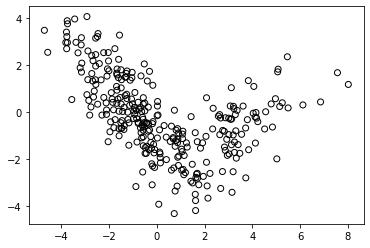

In [13]:
means = np.array([[3, -1], [-1, 0]])

covs = [np.array([[4,  2], [2, 2]]),
        np.array([[2, -2], [-2, 3]])]

mixing_coef = np.array([1, 1])

n_datapoints = np.array([100, 200])

X = gen_data(means, covs, mixing_coef, n_datapoints) 

pl.scatter(X[:,0], X[:,1], marker='o', c='', edgecolor='k') 

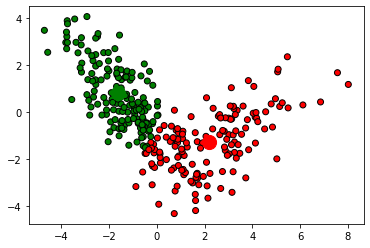

In [14]:
k_means_labels, k_means_cluster_centers = k_means(X, K=2)

colors = ['r', 'g', 'b']
pl.scatter(X[:,0], X[:,1], marker='o', c=np.array(colors)[k_means_labels], edgecolor='k') #Data
pl.scatter(k_means_cluster_centers[0,0], k_means_cluster_centers[0,1], c='r', s=200) #Cluster center 1
pl.scatter(k_means_cluster_centers[1,0], k_means_cluster_centers[1,1], c='g', s=200) #Cluster center 2

## 2. K-means for image compression

Example 1

Refer: http://scikit-learn.org/stable/modules/clustering.html

Text(0.5, 1.0, 'Recreated image: 64 colors')

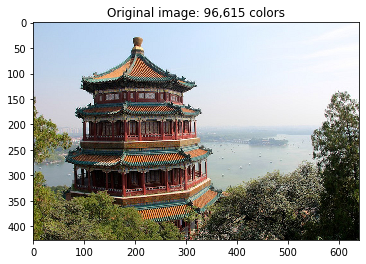

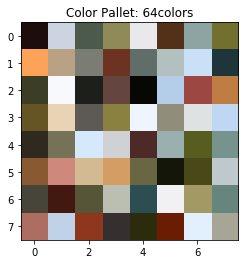

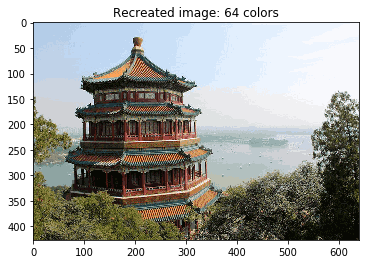

In [15]:
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans
img = load_sample_image("china.jpg")
img.shape, img.dtype

china = np.array(img, dtype=np.float64) / 255

pl.figure()
pl.imshow(china)
pl.title('Original image: 96,615 colors')

n_colors = 64

# Transform image into a 2D numpy array
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

image_array.shape
k_means = KMeans(init='k-means++', n_clusters=n_colors)

image_array_sample = image_array.copy()
np.random.shuffle(image_array_sample)
image_array_sample = image_array_sample[:1000]
k_means.fit(image_array_sample)

colorPallete = k_means.cluster_centers_

pl.figure()
pl.imshow(colorPallete.reshape((n_colors//8, 8, 3)), interpolation="none")
pl.title('Color Pallet: '+str(n_colors)+'colors');

predicted_labels = k_means.predict(image_array)

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

recreated_image = recreate_image(colorPallete, predicted_labels, china.shape[0], china.shape[1])

pl.figure()
pl.imshow(recreated_image)
pl.title('Recreated image: {} colors'.format(n_colors))

Example 2

Text(0.5, 1.0, 'Recreated image: 8 colors')

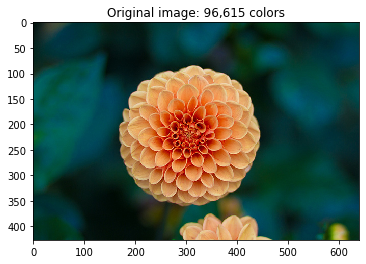

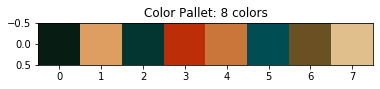

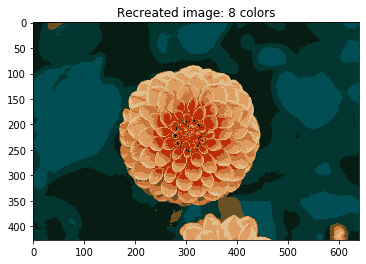

In [16]:
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans
img = load_sample_image("flower.jpg")
img.shape, img.dtype

china = np.array(img, dtype=np.float64) / 255

pl.figure()
pl.imshow(china)
pl.title('Original image: 96,615 colors')

n_colors = 8

# Transform image into a 2D numpy array
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

image_array.shape
k_means = KMeans(init='k-means++', n_clusters=n_colors)

image_array_sample = image_array.copy()
np.random.shuffle(image_array_sample)
image_array_sample = image_array_sample[:1000]
k_means.fit(image_array_sample)

colorPallete = k_means.cluster_centers_

pl.figure()
pl.imshow(colorPallete.reshape((n_colors//8, 8, 3)), interpolation="none")
pl.title('Color Pallet: '+str(n_colors)+' colors');

predicted_labels = k_means.predict(image_array)

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

recreated_image = recreate_image(colorPallete, predicted_labels, china.shape[0], china.shape[1])

pl.figure()
pl.imshow(recreated_image)
pl.title('Recreated image: {} colors'.format(n_colors))

**Exercise: ** Plot compression ratio vs. number of clusters. 